In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations,permutations
from scipy.stats import pearsonr



sns.set()

df = pd.read_excel("一晓网络自动回归建模推理机(指数对应数据).xlsx")
df





/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,一级类目id,统计日期,日期类型,平台,终端,访客指数\nuvHits,收藏次数指数\ncltHot,加购次数指数\ncartHot,加购人数指数\ncartHits,浏览量指数\npvHot,...,访客数\nuv,收藏次数\ncltTimes,加购次数\ncartTimes,加购人数\ncartByrCnt,浏览量\npv,收藏人数\ncltByrCnt,搜索人数\n,搜索次数\n,买家数\n,交易金额\n
0,50020579,2020-02-01,month,TM,All,5471,13,59,428,7478,...,3939,121,434,370,10088,102,1702.0,986.0,134.0,34495.0
1,50020579,2020-07-01,month,TM,All,5610,8,86,615,7622,...,4205,72,542,446,10931,65,2104.0,1134.0,265.0,63632.0
2,50020579,2020-08-01,month,TM,All,5840,11,163,828,8504,...,4679,102,709,566,12367,88,2516.0,1364.0,289.0,74827.0
3,50020579,2020-01-01,month,TM,All,5984,10,115,701,7824,...,4745,90,619,509,11848,80,1970.0,1145.0,202.0,45152.0
4,50020579,2020-04-01,month,TM,All,6578,11,163,876,10257,...,5569,102,709,589,13902,90,2501.0,1528.0,234.0,57164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,50020579,2019-12-01,month,All,All,1361136,391418,723947,592721,2870554,...,46869159,7217572,28709544,9689248,556140166,3607100,NaN,NaN,NaN,NaN
1626,50020579,2020-06-01,month,All,All,1368766,385218,728044,587916,2853912,...,48150166,6837318,29368999,9636505,540067721,3609798,NaN,NaN,NaN,NaN
1627,50020579,2020-05-01,month,All,All,1369191,390794,720186,584143,2864155,...,48338649,7114983,27843791,9558788,551940386,3686052,NaN,NaN,NaN,NaN
1628,50020579,2020-08-01,month,All,All,1370125,387451,714811,549250,2828228,...,48805635,6929017,26072045,9145802,515510096,3729158,NaN,NaN,NaN,NaN


In [2]:
df.columns

Index(['一级类目id', '统计日期', '日期类型', '平台', '终端', '访客指数\nuvHits', '收藏次数指数\ncltHot',
       '加购次数指数\ncartHot', '加购人数指数\ncartHits', '浏览量指数\npvHot',
       '收藏人数指数\ncltHits', '搜索人数指数\nsePvIndex', '搜索次数指数\nseIpvUvHits',
       '买家数指数\npayByrCntIndex', '交易指数\ntradeIndex', '访客数\nuv',
       '收藏次数\ncltTimes', '加购次数\ncartTimes', '加购人数\ncartByrCnt', '浏览量\npv',
       '收藏人数\ncltByrCnt', '搜索人数\n', '搜索次数\n', '买家数\n', '交易金额\n'],
      dtype='object')

In [3]:
XY= dict()

def correlation(x, y):
    return (((x-x.mean())/(x.std(ddof=0)))*((y-y.mean())/(y.std(ddof=0)))).mean() 


In [4]:
#设置相关系数强度
temp = dict()
argmin_pearson = 0.5
columns = ['访客指数\nuvHits', '收藏次数指数\ncltHot',
       '加购次数指数\ncartHot', '加购人数指数\ncartHits', '浏览量指数\npvHot',
       '收藏人数指数\ncltHits', '搜索人数指数\nsePvIndex', '搜索次数指数\nseIpvUvHits',
       '买家数指数\npayByrCntIndex', '交易指数\ntradeIndex', '访客数\nuv',
       '收藏次数\ncltTimes', '加购次数\ncartTimes', '加购人数\ncartByrCnt', '浏览量\npv',
       '收藏人数\ncltByrCnt', '搜索人数\n', '搜索次数\n', '买家数\n', '交易金额\n']


for comb in permutations(columns,2):
    #print(comb)
    #print(df[comb[0]].to_numpy())
    a,b =df[comb[0]].to_numpy().astype(float),df[comb[1]].to_numpy().astype(float)
    pearson =np.corrcoef(a,b)[0,1]
    
    a,b = comb[0],comb[1]
    if a in temp:
        temp[a].append([b,pearson])
    else:
        temp.update({a:[[b,pearson]]})

                    
for comb,vars_ in temp.items():
    data = np.array(vars_)
    temp_sorted = comb,data[np.argsort(data[:,1].astype(float))]
    Y,Xi,Xscore = temp_sorted[0],temp_sorted[1][:,0],temp_sorted[1][:,1]
    
    XY.update({Y:[Xi,Xscore.astype(float)]})
XY

{'访客指数\nuvHits': [array(['交易指数\ntradeIndex', '搜索人数指数\nsePvIndex', '搜索次数指数\nseIpvUvHits',
         '买家数指数\npayByrCntIndex', '加购次数\ncartTimes', '浏览量\npv',
         '收藏次数\ncltTimes', '加购人数\ncartByrCnt', '收藏人数\ncltByrCnt', '访客数\nuv',
         '加购次数指数\ncartHot', '收藏次数指数\ncltHot', '加购人数指数\ncartHits',
         '浏览量指数\npvHot', '收藏人数指数\ncltHits', '搜索人数\n', '搜索次数\n', '买家数\n',
         '交易金额\n'], dtype='<U32'),
  array([0.30409841, 0.3281594 , 0.35056464, 0.37914043, 0.88056208,
         0.89694382, 0.90270671, 0.92631324, 0.93390042, 0.95428767,
         0.96055018, 0.97720441, 0.9789088 , 0.98019455, 0.98887994,
                nan,        nan,        nan,        nan])],
 '收藏次数指数\ncltHot': [array(['搜索人数指数\nsePvIndex', '交易指数\ntradeIndex', '搜索次数指数\nseIpvUvHits',
         '买家数指数\npayByrCntIndex', '加购次数\ncartTimes', '浏览量\npv',
         '加购人数\ncartByrCnt', '收藏次数\ncltTimes', '加购次数指数\ncartHot',
         '收藏人数\ncltByrCnt', '访客数\nuv', '加购人数指数\ncartHits', '浏览量指数\npvHot',
         '访客指数\nuvHits', '收藏人数指数\

In [5]:


#Xp = df[['加购次数\ncartTimes', '浏览量\npv', '收藏次数\ncltTimes', '加购人数\ncartByrCnt','收藏人数\ncltByrCnt', '访客数\nuv']]
#Yp = df['访客指数\nuvHits']

import numpy as np
from sklearn.metrics import r2_score
 
def generateX(column_names):
    data_X = df[column_names]
    return data_X.to_numpy()


def generateY(column_name):
    data_Y = df[column_name]
    data_Y = data_Y.apply(lambda x : 0 if pd.isna(x)==True else x)
    return data_Y.to_numpy()

Xp,Yp=generateX(['加购次数\ncartTimes', '浏览量\npv', '收藏次数\ncltTimes', '加购人数\ncartByrCnt','收藏人数\ncltByrCnt', '访客数\nuv']),generateY('访客指数\nuvHits')


scaler = StandardScaler()                           #实例化
scaler.fit(Xp)                                    #fit，本质是生成均值和方差
 
scaler.mean_                                        #查看均值的属性mean_
scaler.var_                                         #查看方差的属性var_
 
x_std = scaler.transform(Xp)                      #通过接口导出结果
 
x_std.mean()                                        #导出的结果是一个数组，用mean()查看均值
x_std.std()                                         #用std()查看方差
 
init_X = scaler.fit_transform(Xp)                          #使用fit_transform(data)一步达成结果
 
scaler.inverse_transform(x_std)                     #使用inverse_transform逆转标准




for i in range(1000):
    data = np.c_[Xp,Yp]
    np.random.shuffle(data)
srcX,srcY = data[:,:-1],data[:,-1]

srcX.shape

(1630, 6)

In [6]:


def Z_score(x):
    return (x-x.mean())/np.var(x)

def sample_var(x,dfc=True):
    n = x.size
    ones_vector = np.ones(n)
    mu = x.dot(ones_vector)/n
    return ((x-mu)**2).dot(ones_vector)/(n-dfc)

def sample_std(x,dfc=True):
    return np.sqrt(sample_var(x,dfc=dfc))


def R2(test_y,predict_y):
   
    Ymean = np.mean(test_y)
    SStot = sum((test_y-Ymean)**2)
    SSreg = sum((test_y-predict_y)**2)
    return 1-SSreg/SStot

def adjustedR2(test_x,test_y,predict_y):
    n,p = test_x.shape
    R2_ = R2(test_y,predict_y)
    return 1-((1-R2_)*(n-1))/(n-p-1)


from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
 
#划分测试和验证集
train_X,test_x,train_Y,test_y = train_test_split(srcX,srcY,test_size=0.3, random_state=4)

def testliner_model(train_X,test_x,train_Y,test_y,return_keyword=False):
    sk_regr = linear_model.LinearRegression(n_jobs=64)
    sk_regr.fit(train_X,train_Y)
    predict_ = sk_regr.predict(test_x)
    print({"方差":sample_std(predict_-test_y)})
    print(f"可决系数：[1:{R2(test_y,predict_)}],[2:{r2_score(test_y,predict_)}]")
    print(f"adjustedR2:{adjustedR2(test_x,test_y,predict_)}")

    plt.figure(figsize=(16,9))
    plt.scatter(range(predict_.size),predict_,c='g')
    plt.scatter(range(test_y.size),test_y,c='y')
    plt.plot(predict_-test_y,c='r')
    plt.title("liner_model")
    plt.show()
    plt.close()
    if return_keyword:
        return predict_,test_y
    
    
from sklearn.multioutput import MultiOutputRegressor
import xgboost  as xgb
import  pandas  as  pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def XGBRegressor_model(train_X,test_x,init_train_Y,init_test_y,return_keyword=False):
    Y = np.c_[srcY,srcY]
    print(Y)
    train_X,test_x,train_Y,test_y = train_test_split(srcX,Y,test_size=0.3, random_state=4)
    
    print(train_X.shape,test_x.shape,train_Y.shape,test_y.shape)
    #准备参数
    other_params = {'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
    multioutputregressor =MultiOutputRegressor(xgb.XGBRegressor(
        objective='reg:squarederror',**other_params)
                                              ).fit(train_X, train_Y)
    check=multioutputregressor.predict(test_x)
    print(check.shape,check[:,0].shape)

    print({"方差":sample_std(check[:,1],test_y[:,1])})
    print(f"R2可决系数{R2(check[:,1],test_y[:,1])}")
    print(f"adjustedR2:{adjustedR2(test_x,check[:,1],test_y[:,1])}")
    # print(f"可决系数:[1:{R2(check[:,1],test_y[:,1])}],[2:{check[:,1],test_y[:,1]}]")
    plt.figure(figsize=(16,9))
    plt.scatter(range(check[:,1].size),check[:,1],c='y')
    plt.scatter(range(len(test_y)),test_y[:,1],c='g')
    plt.plot(test_y[:,1]-check[:,1],c='r')
    plt.title("XGBRegressor")
    

    
from sklearn.linear_model import LogisticRegression

def lr(trainX,trainY,TestX):
    log_reg1=LogisticRegression(multi_class="multinomial",solver='newton-cg',max_iter=100,class_weight="balanced",n_jobs=64)
    log_reg1.fit(trainX,trainY)
    return {"预期":log_reg1.predict(TestX),"截距":log_reg1.intercept_,"线性模型的系数":log_reg1.coef_}


{'方差': 64673.61713702102}
可决系数：[1:0.9354611923016559],[2:0.9354611923016559]
adjustedR2:0.9346578046539586


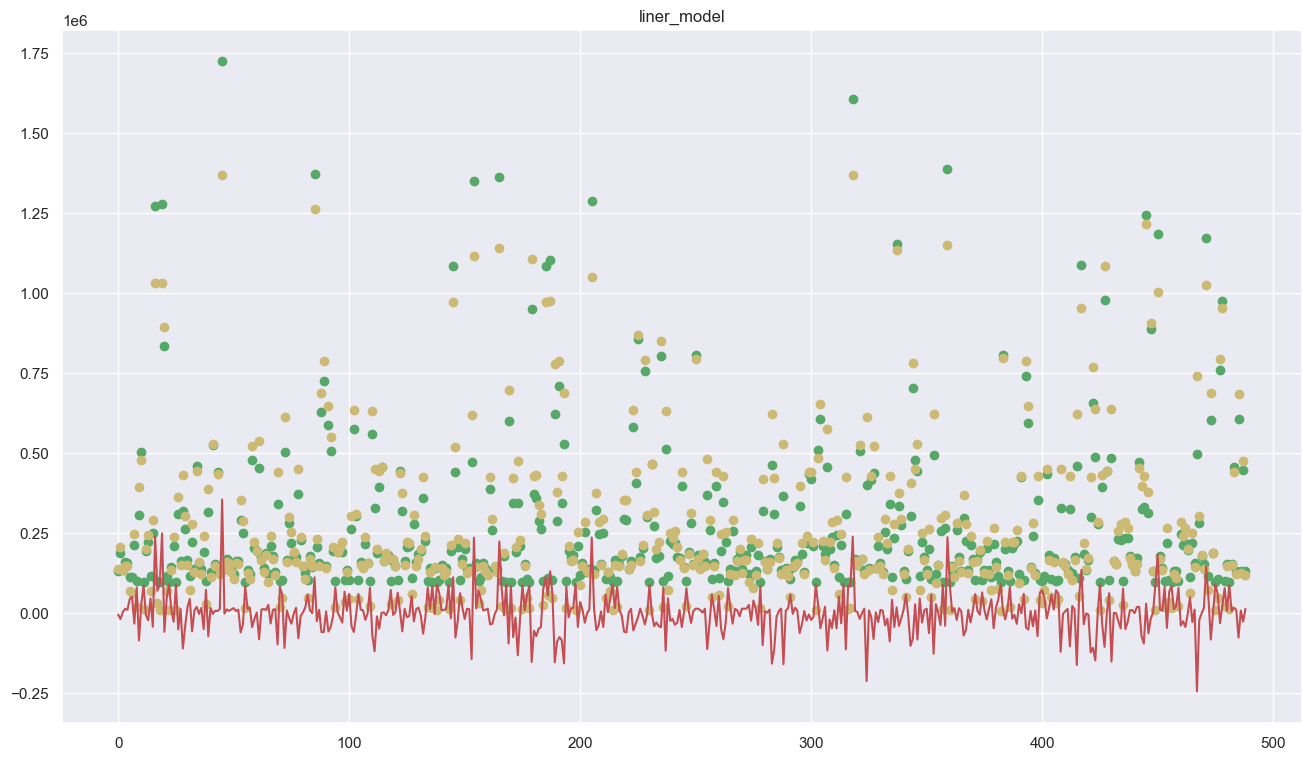

In [7]:
testliner_model(train_X,test_x,train_Y,test_y)

[[397549 397549]
 [277384 277384]
 [219194 219194]
 ...
 [103050 103050]
 [155314 155314]
 [ 40679  40679]]
(1141, 6) (489, 6) (1141, 2) (489, 2)
(489, 2) (489,)
{'方差': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, na

/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


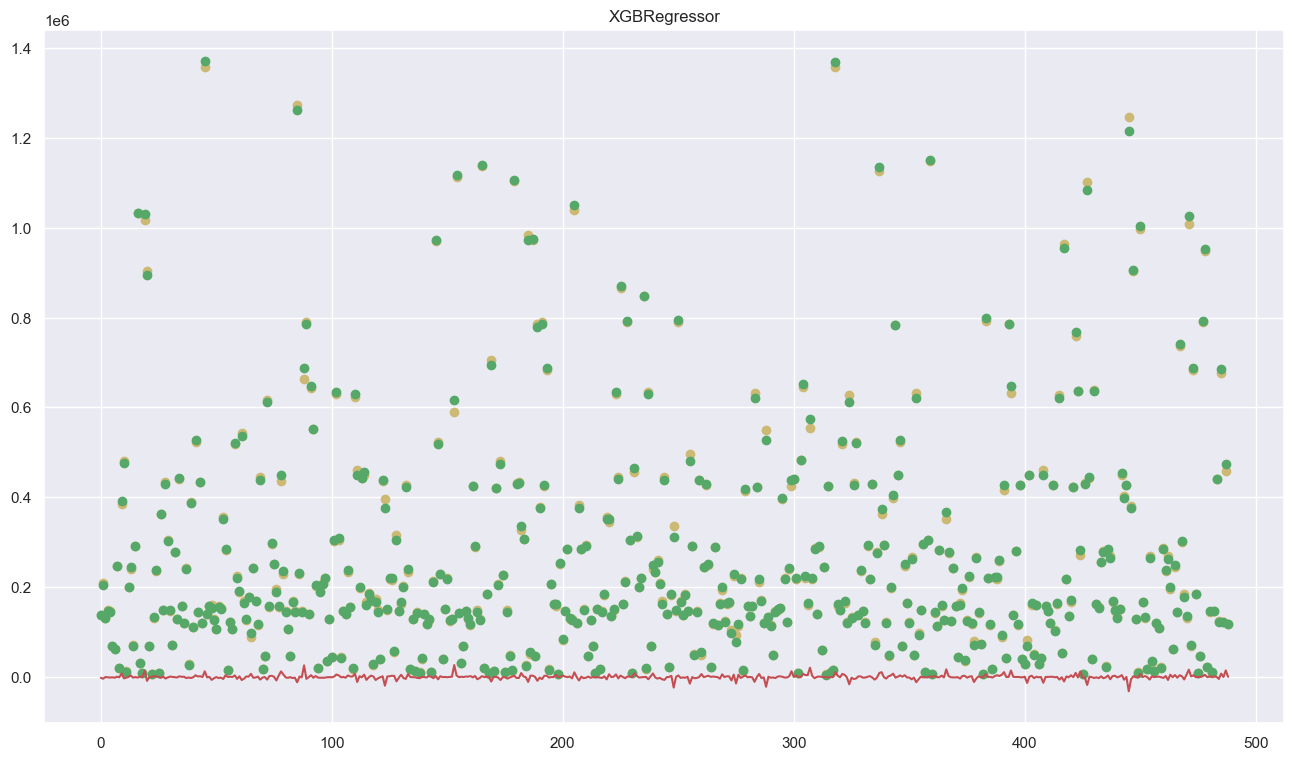

In [8]:
XGBRegressor_model(train_X,test_x,train_Y,test_y)

In [9]:
def Z_score(x):
    return (x-x.mean())/np.var(x)

def sample_var(x,dfc=True):
    n = x.size
    ones_vector = np.ones(n)
    mu = x.dot(ones_vector)/n
    return ((x-mu)**2).dot(ones_vector)/(n-dfc)

def sample_std(x,dfc=True):
    return np.sqrt(sample_var(x,dfc=dfc))

def residual(y,yi):
    return y - yi

def total_sum_of_squares(y,yi):
    n = y.size
    return (residual(y,yi)**2).dot(np.ones(n))




In [10]:
list()

[]

In [11]:
list(combinations(columns,2))

[('访客指数\nuvHits', '收藏次数指数\ncltHot'),
 ('访客指数\nuvHits', '加购次数指数\ncartHot'),
 ('访客指数\nuvHits', '加购人数指数\ncartHits'),
 ('访客指数\nuvHits', '浏览量指数\npvHot'),
 ('访客指数\nuvHits', '收藏人数指数\ncltHits'),
 ('访客指数\nuvHits', '搜索人数指数\nsePvIndex'),
 ('访客指数\nuvHits', '搜索次数指数\nseIpvUvHits'),
 ('访客指数\nuvHits', '买家数指数\npayByrCntIndex'),
 ('访客指数\nuvHits', '交易指数\ntradeIndex'),
 ('访客指数\nuvHits', '访客数\nuv'),
 ('访客指数\nuvHits', '收藏次数\ncltTimes'),
 ('访客指数\nuvHits', '加购次数\ncartTimes'),
 ('访客指数\nuvHits', '加购人数\ncartByrCnt'),
 ('访客指数\nuvHits', '浏览量\npv'),
 ('访客指数\nuvHits', '收藏人数\ncltByrCnt'),
 ('访客指数\nuvHits', '搜索人数\n'),
 ('访客指数\nuvHits', '搜索次数\n'),
 ('访客指数\nuvHits', '买家数\n'),
 ('访客指数\nuvHits', '交易金额\n'),
 ('收藏次数指数\ncltHot', '加购次数指数\ncartHot'),
 ('收藏次数指数\ncltHot', '加购人数指数\ncartHits'),
 ('收藏次数指数\ncltHot', '浏览量指数\npvHot'),
 ('收藏次数指数\ncltHot', '收藏人数指数\ncltHits'),
 ('收藏次数指数\ncltHot', '搜索人数指数\nsePvIndex'),
 ('收藏次数指数\ncltHot', '搜索次数指数\nseIpvUvHits'),
 ('收藏次数指数\ncltHot', '买家数指数\npayByrCntIndex'),
 ('收藏次数指数\ncltHot', '交易指数\ntrad

线性回归本身是有共线性的问题，如果线性回归用皮尔逊系数做特征决策，就会遇到这个问题
所以本项目采用了梯度提升树的方法避开这个问题来找到强相关性的变量来建立集成模型，下文解释了方案可行的原因

为什么特征相关性非常的重要
https://www.toutiao.com/i6750613464797938189/